Task 2: Lookalike Model


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [1]:
import pandas as pd

# Load the datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Aggregate customer transaction data
customer_summary = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count'
}).reset_index()

# Merge with customer data to add demographic features
customers_merged = pd.merge(customers, customer_summary, on='CustomerID', how='left')

# Add more features like 'AverageOrderValue' (TotalValue / Quantity)
customers_merged['AverageOrderValue'] = customers_merged['TotalValue'] / customers_merged['Quantity']

# Display the merged data
customers_merged.head()


,CustomerID,CustomerName,Region,SignupDate,TotalValue,Quantity,TransactionID,AverageOrderValue
0,C0001,Lawrence Carroll,South America,10-07-2022,3354.52,12.0,5.0,279.543333
1,C0002,Elizabeth Lutz,Asia,13-02-2022,1862.74,10.0,4.0,186.274000
2,C0003,Michael Rivera,South America,07-03-2024,2725.38,14.0,4.0,194.670000
3,C0004,Kathleen Rodriguez,South America,09-10-2022,5354.88,23.0,8.0,232.820870
4,C0005,Laura Weber,Asia,15-08-2022,2034.24,7.0,3.0,290.605714


In [2]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Select relevant features for similarity calculation
features = ['TotalValue', 'Quantity', 'TransactionID', 'AverageOrderValue']
customer_data = customers_merged[features]

# Check for missing values
print(customer_data.isnull().sum())

# Handle missing values (fill with column mean in this case)
customer_data = customer_data.fillna(customer_data.mean())

# Normalize features to ensure they are on the same scale
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data)

# Calculate cosine similarity
similarity_matrix = cosine_similarity(customer_data_scaled)

# Display the similarity matrix
similarity_matrix



TotalValue           1
Quantity             1
TransactionID        1
AverageOrderValue    1
dtype: int64


array([[ 1.        , -0.02153304, -0.48623141, ...,  0.78866032,
         0.25188704, -0.44184506],
       [-0.02153304,  1.        ,  0.86362341, ...,  0.48280588,
         0.96059018, -0.83062839],
       [-0.48623141,  0.86362341,  1.        , ...,  0.10785626,
         0.71054542, -0.45719129],
       ...,
       [ 0.78866032,  0.48280588,  0.10785626, ...,  1.        ,
         0.70015106, -0.66614427],
       [ 0.25188704,  0.96059018,  0.71054542, ...,  0.70015106,
         1.        , -0.90635534],
       [-0.44184506, -0.83062839, -0.45719129, ..., -0.66614427,
        -0.90635534,  1.        ]])

In [3]:
import numpy as np

# Initialize a dictionary to store the lookalikes for each customer
lookalikes = {}

# Get the top 3 most similar customers (excluding the customer itself)
for i in range(20):  # For customers C0001 to C0020
    similar_customers = np.argsort(similarity_matrix[i])[::-1][1:4]  # Get the top 3 excluding self
    scores = similarity_matrix[i][similar_customers]
    
    # Store the lookalikes and their similarity scores
    lookalikes[f'C{i+1:04d}'] = [(f'C{j+1:04d}', score) for j, score in zip(similar_customers, scores)]

# Flatten the lookalike dictionary into a DataFrame
lookalike_df = pd.DataFrame(
    [(key, rec[0], rec[1]) for key, recs in lookalikes.items() for rec in recs],
    columns=['CustomerID', 'LookalikeCustomerID', 'SimilarityScore']
)

# Save the results to a CSV file
lookalike_df.to_csv('Lookalike.csv', index=False)

# Display the first few lookalikes
lookalike_df.head()


,CustomerID,LookalikeCustomerID,SimilarityScore
0,C0001,C0164,0.988867
1,C0001,C0103,0.988706
2,C0001,C0069,0.951890
3,C0002,C0029,0.999508
4,C0002,C0031,0.997567


a. Scatter Plot of Similarity Scores for Lookalikes

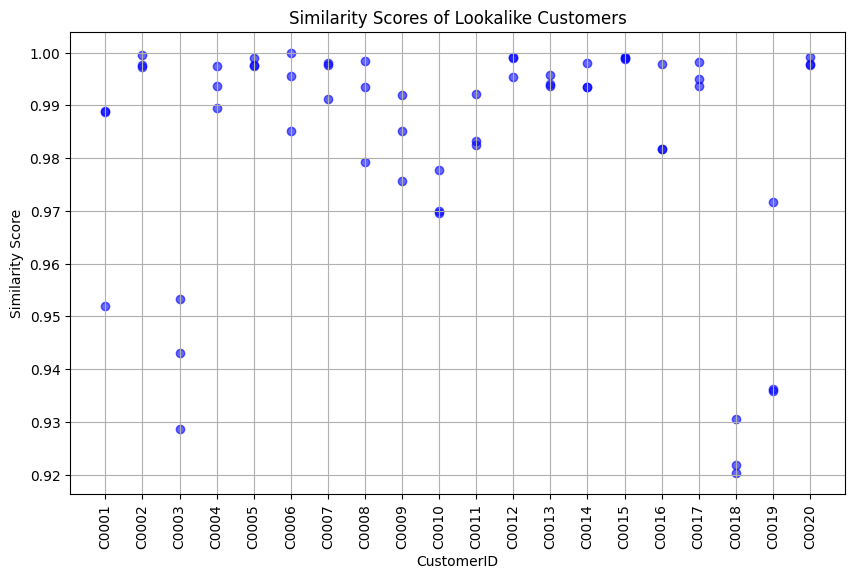

In [10]:
import matplotlib.pyplot as plt

# Plotting scatter plot of similarity scores for each lookalike
plt.figure(figsize=(10, 6))
plt.scatter(lookalike_df['CustomerID'], lookalike_df['SimilarityScore'], color='blue', alpha=0.6)
plt.title('Similarity Scores of Lookalike Customers')
plt.xlabel('CustomerID')
plt.ylabel('Similarity Score')
plt.xticks(rotation=90)  # Rotate customer IDs to avoid overlap
plt.grid(True)
plt.show()


b. Bar Plot for the Top 3 Lookalikes per Customer

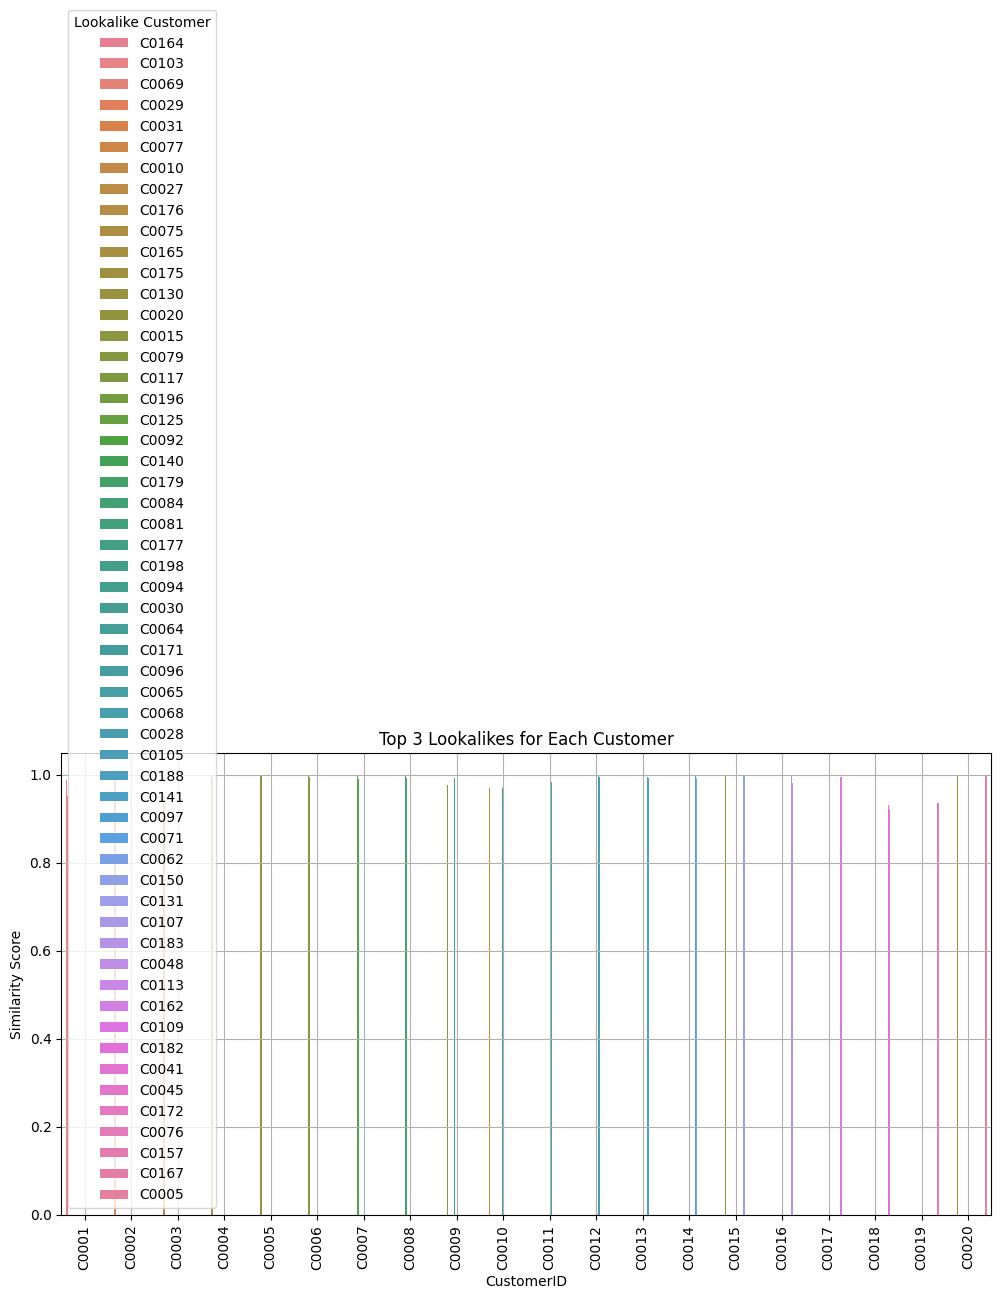

In [11]:
import seaborn as sns

# Grouping by CustomerID and plotting the top 3 lookalike scores
plt.figure(figsize=(12, 6))
sns.barplot(x='CustomerID', y='SimilarityScore', hue='LookalikeCustomerID', data=lookalike_df)
plt.title('Top 3 Lookalikes for Each Customer')
plt.xlabel('CustomerID')
plt.ylabel('Similarity Score')
plt.xticks(rotation=90)  # Rotate customer IDs for better visibility
plt.legend(title='Lookalike Customer')
plt.grid(True)
plt.show()


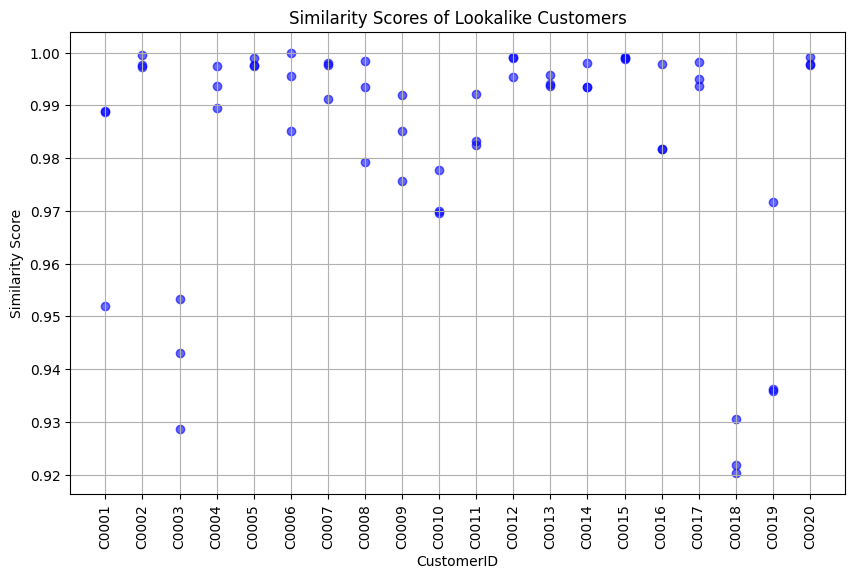

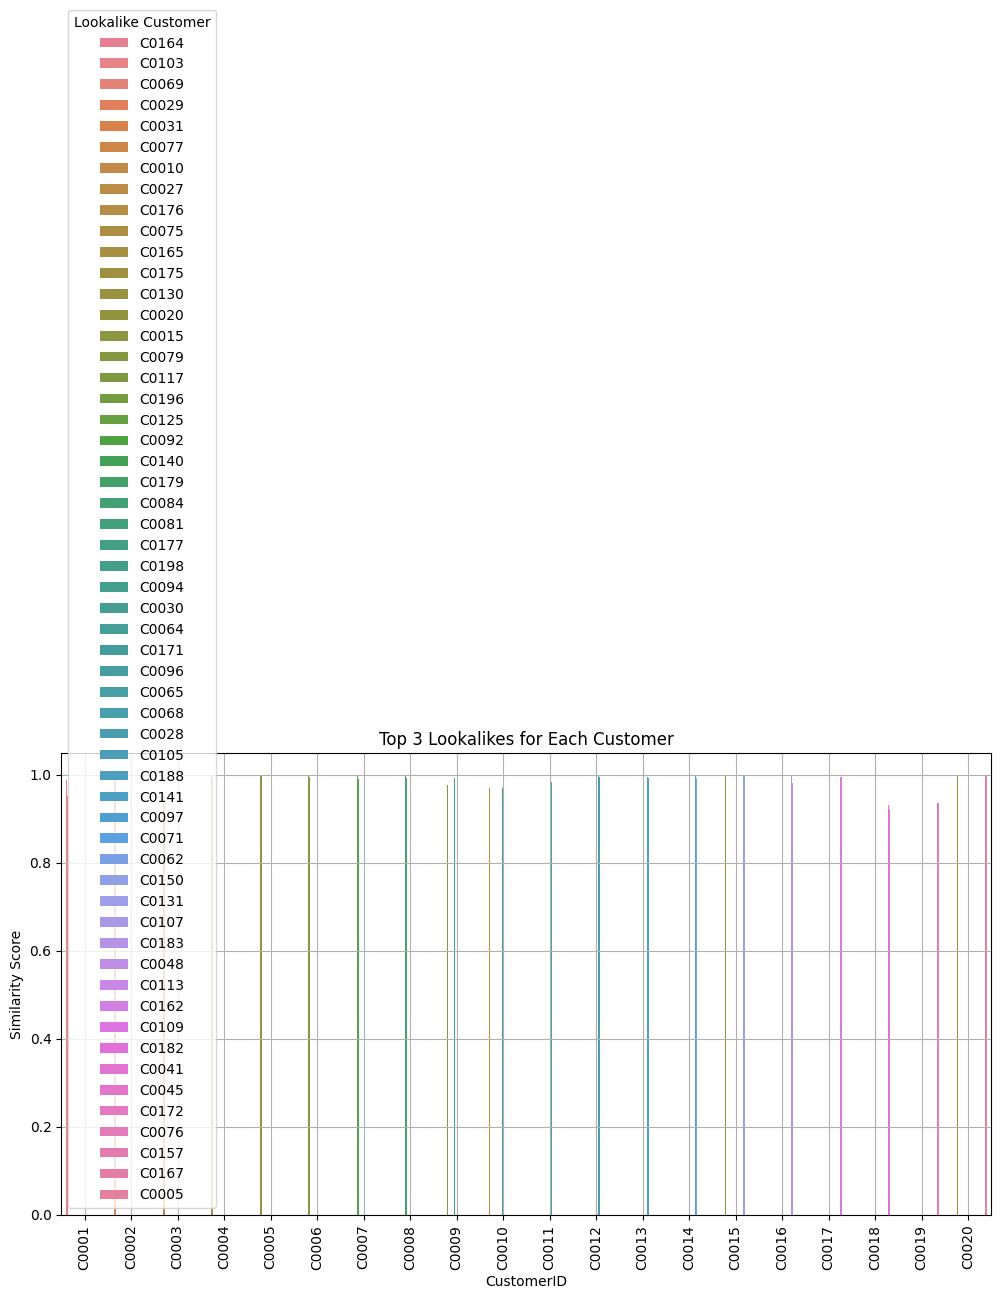

In [12]:
# Save the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(lookalike_df['CustomerID'], lookalike_df['SimilarityScore'], color='blue', alpha=0.6)
plt.title('Similarity Scores of Lookalike Customers')
plt.xlabel('CustomerID')
plt.ylabel('Similarity Score')
plt.xticks(rotation=90)
plt.grid(True)
plt.savefig('scatter_plot.png')

# Save the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='CustomerID', y='SimilarityScore', hue='LookalikeCustomerID', data=lookalike_df)
plt.title('Top 3 Lookalikes for Each Customer')
plt.xlabel('CustomerID')
plt.ylabel('Similarity Score')
plt.xticks(rotation=90)
plt.legend(title='Lookalike Customer')
plt.grid(True)
plt.savefig('bar_plot.png')


TO SAVE THE RESULTS INTO CSV FILE

In [4]:
import pandas as pd
import numpy as np


lookalikes = {}

# Get the top 3 most similar customers (excluding the customer itself)
for i in range(20):  # For customers C0001 to C0020
    similar_customers = np.argsort(similarity_matrix[i])[::-1][1:4]  # Get the top 3 excluding self
    scores = similarity_matrix[i][similar_customers]
    
    # Store the lookalikes and their similarity scores
    lookalikes[f'C{i+1:04d}'] = [(f'C{j+1:04d}', score) for j, score in zip(similar_customers, scores)]

# Flatten the lookalike dictionary into a DataFrame
lookalike_df = pd.DataFrame(
    [(key, rec[0], rec[1]) for key, recs in lookalikes.items() for rec in recs],
    columns=['CustomerID', 'LookalikeCustomerID', 'SimilarityScore']
)

# Save the results to a CSV file
lookalike_df.to_csv('Lookalike.csv', index=False)

# Display the first few lookalikes
lookalike_df.head()


,CustomerID,LookalikeCustomerID,SimilarityScore
0,C0001,C0164,0.988867
1,C0001,C0103,0.988706
2,C0001,C0069,0.951890
3,C0002,C0029,0.999508
4,C0002,C0031,0.997567
